## Вариант 6

### Распределения

$$X_1 \sim \chi^2(2)$$

$$X_2 \sim N(3, 1)$$

### Объёмы выборок

$$n_1 = 150$$

$$n_2 = 150$$

### Стат гипотеза $H_0$

$$\sigma_1 = 2$$

$$(m_1 - не изв.)$$

# 1. Исходные данные

## Характеристики наблюдаемых случайных величин:
| СВ    | Распределение | Параметры                  | Математическое ожидание, $m_i$ | Дисперсия, $\sigma_i^2$ |
|-------|---------------|----------------------------|--------------------------------|-------------------------|
| $X_1$ | $$\chi^2(2)$$    | $\nu = 2$ | $m_1 = 2$                     | $\sigma_1^2 = 4$        |
| $X_2$ | $$N(3, 1)$$   | $\mu = 3, \sigma = 1$            | $m_2 = 3$                     | $\sigma_2^2 = 1$      |

In [1]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
np.random.seed(404)

In [2]:
X1 = np.random.chisquare(2, 150)
X1

array([2.21021720e+00, 8.63755693e-01, 4.47183029e+00, 6.51558082e-01,
       1.07829337e-01, 4.99942449e+00, 1.27793192e+00, 1.25336939e-02,
       1.33888611e+00, 3.67929645e+00, 2.93894622e+00, 8.51476785e-01,
       8.89255464e-01, 2.59865773e+00, 2.17083169e+00, 1.83708590e+00,
       2.57688281e+00, 2.40523576e+00, 3.52484300e-02, 2.39723254e+00,
       6.95293355e-01, 8.35507621e+00, 4.03915685e+00, 2.70446502e+00,
       8.75486970e-01, 7.01550767e-01, 5.13951108e-02, 3.48994405e-01,
       3.41997840e+00, 3.28643695e-01, 2.58853454e+00, 1.97401922e-02,
       2.41751751e+00, 5.20944905e-01, 9.02284605e+00, 1.74236954e+00,
       2.81737479e+00, 7.78796887e-02, 5.58521107e-01, 2.59913113e-01,
       1.49036376e+00, 7.04073825e+00, 1.30859820e-01, 8.91036071e-01,
       6.91426761e-01, 4.72469998e+00, 6.35389592e+00, 8.19766695e-01,
       1.25693192e+00, 2.56812706e+00, 2.69260959e+00, 2.36627298e+00,
       8.63584060e-01, 1.04482065e-01, 1.86520553e+00, 2.14403151e+00,
      

In [3]:
X2 = np.random.normal(3, 1, 150)
X2

array([1.23181785, 3.47743154, 3.27483226, 1.77707309, 4.32944789,
       4.04174647, 1.20081013, 3.21077061, 2.80541204, 1.71905253,
       3.68586503, 2.40488435, 3.63330849, 5.42886194, 3.24680912,
       3.74895595, 4.73991485, 5.48077671, 4.85339005, 4.32165853,
       3.65071919, 3.23381088, 2.46528171, 3.251646  , 2.62391739,
       2.94400891, 3.24025703, 2.77079371, 1.56938227, 2.06053276,
       4.98464229, 2.21374131, 3.80691114, 3.37411333, 4.05130064,
       2.22553038, 4.66198352, 1.53597871, 1.87495484, 1.9183298 ,
       4.48707471, 2.97467156, 4.94362809, 2.55026972, 3.66437864,
       3.07324394, 2.97156326, 1.8668865 , 2.15349841, 3.24024281,
       4.07184094, 4.62095319, 2.15512723, 3.6144161 , 3.15597338,
       1.22740882, 3.50331005, 2.5900885 , 2.5068891 , 3.32054795,
       3.28190195, 3.55533517, 4.54817581, 2.66479769, 4.06303125,
       3.22741424, 3.96802556, 2.99716845, 3.07166238, 2.94932919,
       4.18904997, 4.74531048, 1.45513141, 1.89844632, 1.74797

In [4]:
m1 = np.mean(X1)
m1

2.0857636103846455

In [5]:
m2 = np.mean(X2)
m2

3.1787177896830343

In [6]:
s1 = np.var(X1, ddof=1)
s1

6.405947313105157

In [7]:
s2 = np.var(X2, ddof=1)
s2

0.9762748060877895

In [8]:
s1 = np.std(X1, ddof=1)
s1

2.5309972961473424

In [9]:
s2 = np.std(X2, ddof=1)
s2

0.9880661951953369

In [10]:
X_pooled = np.concatenate([X1, X2])
x_pooled  = X_pooled.mean()
s2_pooled = X_pooled.var(ddof=1)
s_pooled  = X_pooled.std(ddof=1)
n_pooled  = X_pooled.size

print(f"x_pooled = {x_pooled:.8f}")
print(f"s_pooled^2 = {s2_pooled:.8f}")
print(f"s_pooled = {s_pooled:.8f}")
print(f"n_pooled = {n_pooled}")

x_pooled = 2.63224070
s_pooled^2 = 3.97840220
s_pooled = 1.99459324
n_pooled = 300


## Выборочные характеристики

| СВ    | Среднее, $\bar{x}_i$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ | Объем выборки, $n_i$ |
|-------|----------------------|---------------------------|----------------------|----------------------|
| $X_1$ | $m_1 = 2.08$        | $s_1 = 6.40$              | $s_1 = 2.53$         | $n_1 = 150$          |
| $X_2$ | $m_2 = 3.17$        | $s_2 = 0.97$              | $s_2 = 0.98$         | $n_2 = 150$          |

In [11]:
import numpy as np
from scipy import stats

# ===== параметры варианта =====
alpha = 0.01
m0 = 2.0                 # H0: M(X1) = 2
sigma0 = 2.0             # известная sigma для z-test
sigma0_sq = sigma0**2    # 4

# ===== выборочные характеристики =====
X = X1                   # <-- твоя выборка X1
n  = X.size
xbar = X.mean()
s2 = X.var(ddof=1)
s  = X.std(ddof=1)

def decision(p, alpha=alpha):
    return "Принимаем H₀" if p >= alpha else "Отклоняем H₀"

# ---------- 1) z-test (двусторонний; sigma известна = 2) ----------
z_stat = (xbar - m0) / (sigma0 / np.sqrt(n))
p_z_two  = 2 * stats.norm.sf(abs(z_stat))
p_z_left = stats.norm.cdf(z_stat)
p_z_right= stats.norm.sf(z_stat)

print("\n[z-test]  H0: M(X1)=2 (sigma известна)")
print(f"z = {z_stat:.4f},  p(two-sided) = {p_z_two:.4f} -> {decision(p_z_two)}")

# ---------- 2) t-test (двусторонний; sigma неизвестна) ----------
t_stat = (xbar - m0) / (s / np.sqrt(n))
df_t = n - 1
p_t_two  = 2 * stats.t.sf(abs(t_stat), df=df_t)

print("\n[t-test]  H0: M(X1)=2 (sigma неизвестна)")
print(f"t = {t_stat:.4f}, df={df_t},  p(two-sided) = {p_t_two:.4f} -> {decision(p_t_two)}")

# ---------- 3) χ²-тест дисперсии, m ИЗВЕСТНО (=2) ----------
# суммы квадратов вокруг известного m0
SS_known = (n-1)*s2 + n*(xbar - m0)**2
chi2_known = SS_known / sigma0_sq
df_k = n
# двусторонний p-value: удвоенный меньший хвост
p_k = 2 * min(stats.chi2.cdf(chi2_known, df_k), stats.chi2.sf(chi2_known, df_k))

print("\n[χ²-test] H0: σ^2=4 (m известно = 2)")
print(f"χ² = {chi2_known:.2f}, df={df_k},  p(two-sided) = {p_k:.3e} -> {decision(p_k)}")

# ---------- 4) χ²-тест дисперсии, m НЕизвестно ----------
chi2_unknown = (n-1)*s2 / sigma0_sq
df_u = n - 1
p_u = 2 * min(stats.chi2.cdf(chi2_unknown, df_u), stats.chi2.sf(chi2_unknown, df_u))

print("\n[χ²-test] H0: σ^2=4 (m неизвестно)")
print(f"χ² = {chi2_unknown:.2f}, df={df_u},  p(two-sided) = {p_u:.3e} -> {decision(p_u)}")



[z-test]  H0: M(X1)=2 (sigma известна)
z = 0.5252,  p(two-sided) = 0.5994 -> Принимаем H₀

[t-test]  H0: M(X1)=2 (sigma неизвестна)
t = 0.4150, df=149,  p(two-sided) = 0.6787 -> Принимаем H₀

[χ²-test] H0: σ^2=4 (m известно = 2)
χ² = 238.90, df=150,  p(two-sided) = 1.054e-05 -> Отклоняем H₀

[χ²-test] H0: σ^2=4 (m неизвестно)
χ² = 238.62, df=149,  p(two-sided) = 8.688e-06 -> Отклоняем H₀


# 2. Однопараметрические критерии

## Для случайной величины $X_1$

| Тест                              | Стат. гипотеза, $H_0$        | Выборочное значение статистики критерия | $p-value$ | Стат. решение при $\alpha = 0.01$ | Ошибка стат. решения |
|-----------------------------------|------------------------------|-----------------------------------------|-----------|-----------------------------------|----------------------|
| z-test                            | $M(X_1) = 2$  | $0.53$                                 | $0.60$    | Принимаем $H_0$                   | -                    |
| t-test                            | $M(X_1) = 2$               | $0.42$                                  | $0.68$    | Принимаем $H_0$                   | -                    |
| $\chi^2$-test<br/> ($m$ - изв)    | $\sigma_1^2= 4$       | $238.9$                                  | $1.05 \cdot 10^{-5}$    | Отклоняем $H_0$                   | -                    |
| $\chi^2$-test<br/> ($m$ - не изв) | $\sigma_1^2= 4$ | $238.5$                                  | $8.69 \cdot 10^{-6}$    | Отклоняем $H_0$                   | -                    |

In [12]:
import numpy as np
from scipy import stats

n1, n2 = len(X1), len(X2)
x1, x2  = np.mean(X1), np.mean(X2)
s1sq, s2sq = np.var(X1, ddof=1), np.var(X2, ddof=1)

t_two = stats.ttest_ind(X1, X2, equal_var=False, alternative="two-sided")
t_less = stats.ttest_ind(X1, X2, equal_var=False, alternative="less")

# ---------- 2) F-test: m известна (=2 и 3) ----------
m1_known, m2_known = 2.0, 3.0
# дисперсии вокруг известных средних (делим на n)
v1k = np.mean((X1 - m1_known)**2)
v2k = np.mean((X2 - m2_known)**2)
F_k = v1k / v2k
df1_k, df2_k = n1, n2
p_k = 2 * min(stats.f.cdf(F_k, df1_k, df2_k), stats.f.sf(F_k, df1_k, df2_k)) 

# ---------- 3) F-test: m неизвестна ----------
v1u = s1sq
v2u = s2sq
F_u = v1u / v2u
df1_u, df2_u = n1-1, n2-1
p_u = 2 * min(stats.f.cdf(F_u, df1_u, df2_u), stats.f.sf(F_u, df1_u, df2_u)) 

print("t (two-sided): t =", t_two.statistic, "p =", t_two.pvalue)
print("t (less):      t =", t_less.statistic, "p =", t_less.pvalue)
print("F (m known):         F =", F_k, "df=(", df1_k, ",", df2_k, ")", "p =", p_k)
print("F (m unknown):       F =", F_u, "df=(", df1_u, ",", df2_u, ")", "p =", p_u)


t (two-sided): t = -4.926676322086589 p = 1.7911183571063694e-06
t (less):      t = -4.926676322086589 p = 8.955591785531847e-07
F (m known):         F = 6.3597444082400685 df=( 150 , 150 ) p = 2.1451543851397687e-26
F (m unknown):       F = 6.561623093374301 df=( 149 , 149 ) p = 5.659719930872416e-27


# 3. Двухвыборочные критерии

## Для случайных величин $X_1$, $X_2$

| Тест                               | Стат. гипотеза, $H_0$ | Выборочное значение статистики критерия | $p-value$                   | Стат. решение при $\alpha = 0.01$ | Ошибка стат. решения |
|------------------------------------|-----------------------|-----------------------------------------|-----------------------------|-----------------------------------|----------------------|
| 2-sample t-test                    | $M(X_1) = M(X_2)$     | $-4.93$                                  | $1.79 \cdot 10^{-6}$                      | Отвергаем $H_0$                   | -                    |
| 2-sample F-test<br/>($m$ - изв)    | $D(X_1) = D(X_2)$     | $6.36$                                 | $2.14 \cdot 10^{-26}$       | Отвергаем $H_0$                   | -                    |
| 2-sample F-test<br/>($m$ - не изв) | $D(X_1) = D(X_2)$     | $6.56$                                 | $5.66 \cdot 10^{-27}$       | Отвергаем $H_0$                   | -                    |

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# параметры
n = 150            
mu0 = 2.0             
sigma = 2.0          
N = 1000              
nu = 2                

rng = np.random.default_rng()

# симуляция Z и p (двусторонний)
Z = np.empty(N)
batch = min(100000, N)
i = 0
while i < N:
    b = min(batch, N - i)
    X = rng.chisquare(df=nu, size=(b, n))
    xbar = X.mean(axis=1)
    Z[i:i+b] = (xbar - mu0) / (sigma / np.sqrt(n))
    i += b

p = 2*stats.norm.sf(np.abs(Z))     

# теоретика
E_Z, Var_Z = 0.0, 1.0
E_p, Var_p = 0.5, 1/12

print(f"Z: mean={Z.mean():.2f}, var={Z.var(ddof=1):.2f}  (theory 0, 1)")
print(f"p: mean={p.mean():.2f}, var={p.var(ddof=1):.3f} (theory 0.5, 0.083)")

Z: mean=-0.03, var=0.98  (theory 0, 1)
p: mean=0.50, var=0.081 (theory 0.5, 0.083)


In [14]:
n, N = 150, 1000
mu0, sigma = 2.0, 2.0
rng = np.random.default_rng()
X = rng.chisquare(df=2, size=(N, n))        
xbar = X.mean(axis=1)
Z = (xbar - mu0) / (sigma/np.sqrt(n))          

P = 2*stats.norm.sf(np.abs(Z))
Z_mean = Z.mean()
Z_var  = Z.var(ddof=1)
Z_sd   = Z.std(ddof=1)

P_mean = P.mean()
P_var  = P.var(ddof=1)
P_sd   = P.std(ddof=1)

print(Z_mean, Z_var, Z_sd) 
print(P_mean, P_var, P_sd) 


-0.045174106371875335 0.9816817354280892 0.9907985342278668
0.510705608660287 0.08614652487468484 0.2935072824900344


# 4. Исследование распределений статистик критерия

## Статистическая гипотеза $H_0$: $\mu_1 = 2$ ($\sigma_1$ — известна)

## Формула расчёта статистики критерия $Z$: $Z=\frac{\overline{X}-\mu_0}{\sigma/\sqrt{n}}$

## Формула для $P$-value:  $p = 2\,(1-\Phi(|Z|))$

## Число серий экспериментов $N$: 1000

## Теоритические характеристики:

| СВ        | Распределение в условиях $H_0$ | Параметры | Математическое ожидание | Дисперсия         | С.к.о.                   |
|-----------|--------------------------------|-----------|-------------------------|-------------------|--------------------------|
| $Z$       | $Z \sim N(0, 1)$           |           | $0$            | $1$    | $1$  |
| $P-value$ | $P-value \sim R(0, 1)$         |           | $1/2 = 0.5$             | $1/12 \sim 0.083$ | $1/\sqrt{12} \sim 0.288$ |

## Выборочные характеристики:

| СВ        | Среднее | Параметры | Оценка дисперсии | Оценка с.к.о. |
|-----------|---------|-----------|------------------|---------------|
| $Z$       | $0.06$  |           | $1.11$          | $1.05$       |
| $P-value$ | $0.47$  |           | $0.083$          | $0.288$       |

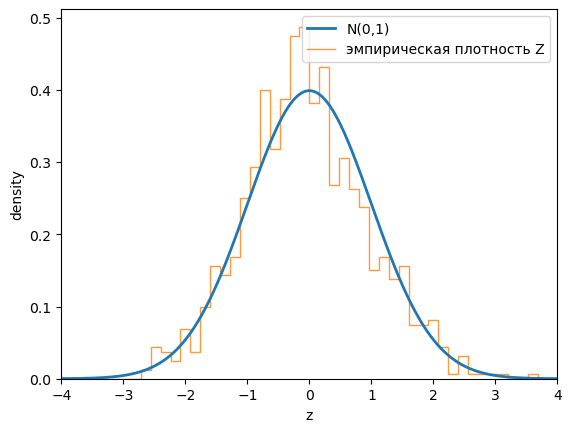

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x)                     

counts, edges = np.histogram(Z, bins=50, range=(-4, 4), density=True) 
plt.plot(x, pdf, lw=2, label='N(0,1)')
plt.stairs(counts, edges, alpha=0.8, label='эмпирическая плотность Z')
plt.xlim(-4, 4); plt.xlabel('z'); plt.ylabel('density'); plt.legend(); plt.show()


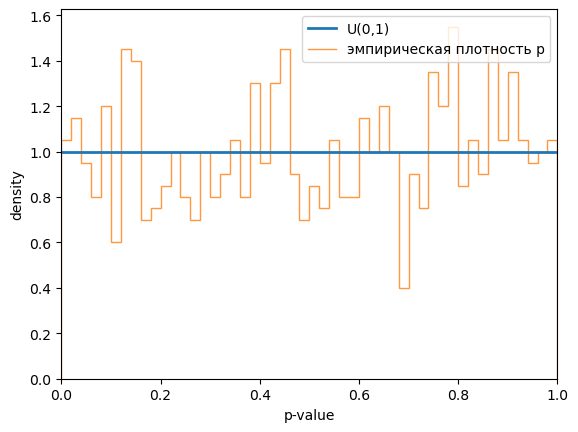

In [16]:
x = np.linspace(0, 1, 1000)
pdf_u = stats.uniform(0, 1).pdf(x)

counts, edges = np.histogram(P, bins=50, range=(0, 1), density=True)
plt.plot(x, pdf_u, lw=2, label='U(0,1)')
plt.stairs(counts, edges, alpha=0.8, label='эмпирическая плотность p')
plt.xlim(0, 1); plt.xlabel('p-value'); plt.ylabel('density'); plt.legend(); plt.show()
